In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import urllib.request as urllib2

For problem 1.11

In [12]:
req = urllib2.Request("http://www.hakank.org/weka/DASL/NuclearPlants.arff")
response = urllib2.urlopen(req)
the_page = response.read()
raw = the_page.decode('utf-8').splitlines()

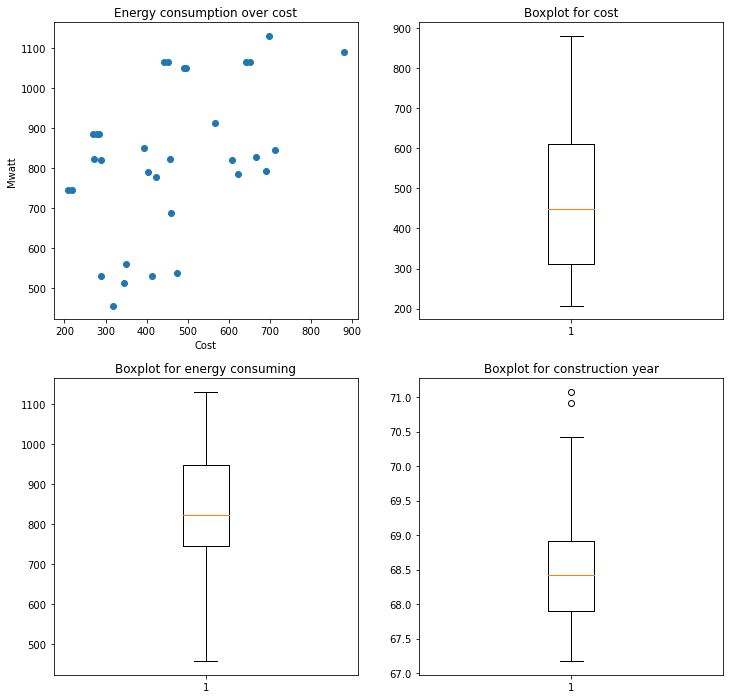

In [16]:
right_place = False
count = 0
data = np.zeros((32,3))
for line in raw:
    if right_place:
        tmp = line.split(",")
        if len(tmp) == 3:
            data[count][0] = float(tmp[0])
            data[count][1] = float(tmp[1])
            data[count][2] = float(tmp[2])
            count+=1 
    elif line.startswith("@DATA"):
        right_place = True
        
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

colors = ['blue','green', 'red']

ax0.scatter(data[:,0],data[:,1])
ax0.set_ylabel("Mwatt")
ax0.set_xlabel("Cost")
ax0.set_title('Energy consumption over cost')

ax1.boxplot(data[:,0])
ax1.set_title('Boxplot for cost')

ax2.boxplot(data[:,1])
ax2.set_title('Boxplot for energy consuming')

ax3.boxplot(data[:,2])
ax3.set_title('Boxplot for construction year')

plt.show()

The average cost is 461.560313 and the standard deviation is 167.441436.
The average cost per megawatt is 0.569735 and the standard deviation is 0.184177.


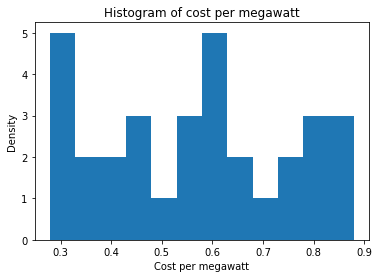

The normalized median is 0.053397.


In [17]:
print("The average cost is %f and the standard deviation is %f." % (data[:,0].mean(), data[:,0].std()))
x = data[:,0]/data[:,1]
print("The average cost per megawatt is %f and the standard deviation is %f." 
      % (x.mean(), x.std()))

plt.hist(x, density=False, bins=12)
plt.ylabel('Density')
plt.xlabel('Cost per megawatt');
plt.title("Histogram of cost per megawatt")
plt.show()

print("The normalized median is %f." % ((np.median(x) - x.mean()) / x.std()))

For problem 1.12

In [19]:
req = urllib2.Request("https://courses.engr.illinois.edu/cs361/sp2019/hotdogs.txt")
response = urllib2.urlopen(req)
the_page = response.read()
raw = the_page.decode('utf-8').splitlines()

In [20]:
beef = np.zeros((20,2))
meat = np.zeros((17,2))
poultry = np.zeros((17,2))
bcount = 0
mcount = 0
pcount = 0
for line in raw:
    if line.startswith("Beef"):
        beef[bcount][0] = int(line[5:8])
        beef[bcount][1] = int(line[-3:])
        bcount+=1
    elif line.startswith("Meat"):
        meat[mcount][0] = int(line[5:8])
        meat[mcount][1] = int(line[-3:])
        mcount+=1
    elif line.startswith("Poultry"):
        poultry[pcount][0] = int(line[8:11])
        poultry[pcount][1] = int(line[-3:])
        pcount+=1

In [21]:
calories = [beef[:,0].tolist(), meat[:,0].tolist(), poultry[:,0].tolist()]
sodium = [beef[:,1].tolist(), meat[:,1].tolist(), poultry[:,1].tolist()]

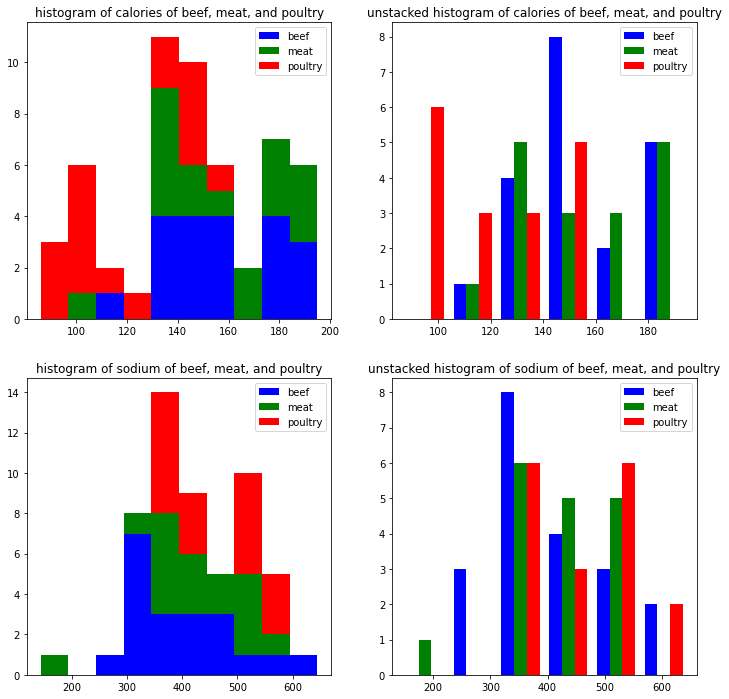

In [25]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

colors = ['blue','green', 'red']

ax0.hist(calories, 10, align=('mid'), histtype='bar', color=colors, stacked=True, fill=True, label=["beef", "meat", "poultry"])
ax0.set_title('histogram of calories of beef, meat, and poultry')
ax0.legend()

ax1.hist(calories, 6, histtype='bar',align=('mid'), color=colors, fill=True, label=["beef", "meat", "poultry"])
ax1.set_title('unstacked histogram of calories of beef, meat, and poultry')
ax1.legend()

ax2.hist(sodium, 10, histtype='bar', align=('mid'), color=colors, stacked=True, fill=True, label=["beef", "meat", "poultry"])
ax2.set_title('histogram of sodium of beef, meat, and poultry')
ax2.legend()

ax3.hist(sodium, 6, histtype='bar', align=('mid'), color=colors, fill=True, label=["beef", "meat", "poultry"])
ax3.set_title('unstacked histogram of sodium of beef, meat, and poultry')
ax3.legend()

plt.show()

For problem 1.13

In [94]:
req = urllib2.Request("http://users.stat.ufl.edu/~winner/sta4211/crd/mag_ads.sas")
response = urllib2.urlopen(req)
the_page = response.read()
raw = the_page.decode('utf-8').splitlines()

In [95]:
del raw[:raw.index("cards; ")+1]
del raw[-2:]
data = [line.split(" ") for line in raw]
for i in range(len(data)):
    data[i] = [a for a in data[i] if a != '']
    
data = np.asarray(data, dtype = 'float')

In [102]:
group1 = data[data[:,4] == 1]
group2 = data[data[:,4] == 2]
group3 = data[data[:,4] == 3]

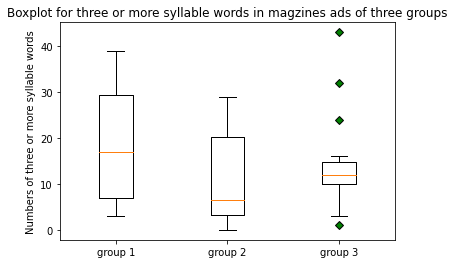

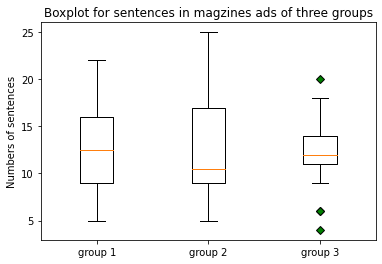

In [123]:
green_diamond = dict(markerfacecolor='g', marker='D')

plt.boxplot([group1[:,2], group2[:,2],group3[:,2]], flierprops=green_diamond, labels=['group 1', 'group 2', 'group 3'])
plt.title('Boxplot for three or more syllable words in magzines ads of three groups')
plt.ylabel("Numbers of three or more syllable words")
plt.show()

plt.boxplot([group1[:,1], group2[:,1],group3[:,1]], flierprops=green_diamond, labels=['group 1', 'group 2', 'group 3'])
plt.title('Boxplot for sentences in magzines ads of three groups')
plt.ylabel("Numbers of sentences")
plt.show()